# Telco Churn Prediction: Comprehensive EDA
 
 This notebook performs in-depth exploratory data analysis to understand:
 - Dataset structure and quality
 - Target variable distribution
 - Feature relationships with churn
 - Data patterns and anomalies

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [111]:
data_path = '../data/Data_UNamur.csv'

churn_data = pd.read_csv(data_path, sep=";")

In [112]:
print(churn_data.head(5))
churn_data.info()
churn_data.describe(include="all")    

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  7795-CFOCW    Male              0      No         No      45           No   
3  9237-HQITU  Female              0      No         No       2          Yes   
4  9305-CDSKC  Female              0      No         No       8          Yes   

      MultipleLines InternetService OnlineSecurity  ... TotalDayMinutes  \
0  No phone service             DSL             No  ...             NaN   
1                No             DSL            Yes  ...           265,1   
2  No phone service             DSL            Yes  ...             NaN   
3                No     Fiber optic             No  ...           332,9   
4               Yes     Fiber optic             No  ...             NaN   

  TotalEveCalls NumbervMailMessages CustomerServiceCalls Internation

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalDayMinutes,TotalEveCalls,NumbervMailMessages,CustomerServiceCalls,InternationalPlan,TotalCall,VoiceMailPlan,TotalNightCalls,TotalNightMinutes,Churn
count,899,899,899.000000,899,899,899.000000,899,899,899,899,...,471,471.000000,471.000000,471.000000,471,471.000000,471,471.000000,471,899
unique,899,2,NaN,2,2,NaN,2,3,3,3,...,421,NaN,NaN,NaN,2,NaN,2,NaN,415,2
top,7590-VHVEG,Female,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,"178,7",NaN,NaN,NaN,No,NaN,No,NaN,"153,2",No
freq,1,462,NaN,463,623,NaN,821,442,403,413,...,3,NaN,NaN,NaN,435,NaN,352,NaN,3,678
mean,NaN,NaN,0.164627,NaN,NaN,33.571746,NaN,NaN,NaN,NaN,...,NaN,99.647558,7.653928,1.566879,NaN,306.282378,NaN,101.261146,NaN,NaN
std,NaN,NaN,0.371050,NaN,NaN,24.770081,NaN,NaN,NaN,NaN,...,NaN,19.213885,13.662076,1.287950,NaN,33.466511,NaN,18.910364,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,43.000000,0.000000,0.000000,NaN,211.000000,NaN,36.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,86.000000,0.000000,1.000000,NaN,284.000000,NaN,89.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,...,NaN,100.000000,0.000000,1.000000,NaN,306.000000,NaN,101.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,57.500000,NaN,NaN,NaN,NaN,...,NaN,114.000000,10.000000,2.000000,NaN,329.000000,NaN,114.000000,NaN,NaN


In [113]:
duplicates = churn_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage: {duplicates/len(churn_data)*100:.2f}%")
else:
    print("No duplicate rows found")

Number of duplicate rows: 0
No duplicate rows found


In [114]:
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'TotalEveMinutes', 'TotalIntlMinutes', 'TotalDayMinutes', 'TotalNightMinutes']  

for col in numeric_cols:
    churn_data[col] = churn_data[col].astype(str)

for col in numeric_cols:
    churn_data[col] = churn_data[col].replace(' ', np.nan)
    
for col in numeric_cols:
    churn_data[col] = churn_data[col].str.replace(',', '.').astype(float)
    


In [115]:
str_cols = churn_data.select_dtypes(include='object').columns
churn_data[str_cols] = churn_data[str_cols].apply(lambda x: x.str.strip())

Missing values per column:
 customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              1
TotalIntlCalls          428
TotalDayCalls           428
TotalEveMinutes         428
TotalIntlMinutes        428
TotalDayMinutes         428
TotalEveCalls           428
NumbervMailMessages     428
CustomerServiceCalls    428
InternationalPlan       428
TotalCall               428
VoiceMailPlan           428
TotalNightCalls         428
TotalNightMinutes       428
Churn                     0
dtype: int64


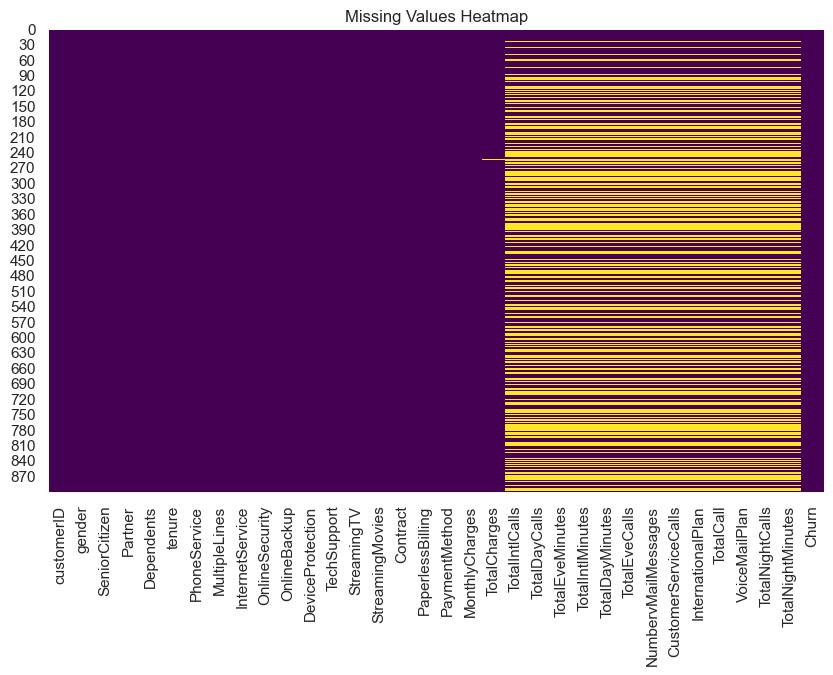

In [116]:
missing_counts = churn_data.isna().sum()
print("Missing values per column:\n", missing_counts)


plt.figure(figsize=(10,6))
sns.heatmap(churn_data.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

After checking for missing values in our dataset, we observed the following:

Most columns (e.g., customerID, gender, tenure, Churn) have no missing values, which means these features are complete and ready to use.

The TotalCharges column has 1 missing value, which likely corresponds to a very new customer with no charges yet. We will impute this value using the median to avoid losing data.

Several usage-related columns have 428 missing values each, including: TotalIntlCalls, TotalDayCalls, TotalEveMinutes, TotalIntlMinutes,
TotalDayMinutes, TotalEveCalls, NumbervMailMessages, CustomerServiceCalls,
InternationalPlan, TotalCall, VoiceMailPlan, TotalNightCalls, TotalNightMinutes

Planned handling:

TotalCharges - impute with median.




In [117]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].median())


usage_cols = [
    'TotalIntlCalls', 'TotalDayCalls', 'TotalEveMinutes', 'TotalIntlMinutes',
    'TotalDayMinutes', 'TotalEveCalls', 'NumbervMailMessages', 'CustomerServiceCalls',
    'InternationalPlan', 'TotalCall', 'VoiceMailPlan', 'TotalNightCalls', 'TotalNightMinutes'
]

# what to do with the missing columns for almost half the dataset?
